<a href="https://colab.research.google.com/github/Eraneo/Projek-Akhir-Pemrosesan-Teks/blob/main/Salinan_Source_Code_Progess_2_Projek_Pemrosesan_Teks_Kelompok_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Projek Akhir Pemrosesan Teks**

Dosen pengampu: Ulfa Siti Nuraini, S.Stat., M.Stat.

Kelompok: 8

1. Elvian Eraneo Subroto (251155001)
2. Na'illah Shania Rizqillah (24031554225)
3. Refochella Florentine Gwacevo Pertiwi (24031554045)

# **1.Pengambilan data**

## Data komen tiktok

In [ ]:
"""! pip install apify_client pandas"""

'! pip install apify_client pandas'

In [ ]:
"""from apify_client import ApifyClient

# Initialize the ApifyClient with your API token
client = ApifyClient("apify_api_VZjgYMcz4sHOdg8T829UZZ0WYdCsXG3WlT2s")

# Prepare the Actor input
run_input = {
    "commentsPerPost": 500,
    "excludePinnedPosts": False,
    "maxRepliesPerComment": 50,
    "postURLs": [
        "https://www.tiktok.com/@sellersolution/video/7573169400082156808?q=tanggapan%20terkait%20jualan%20online%3F&t=1763721521730",
        "https://www.tiktok.com/@aziz.yevo/video/7563892053151714578?q=tanggapan%20terkait%20jualan%20online%3F&t=1763721521730",
        "https://www.tiktok.com/@bobaacaramel507/video/7528070975204625682?q=keluh%20kesah%20belanja%20online%3F&t=1763721748467",
        "https://www.tiktok.com/@opangverse/video/7549686218196258104?q=keluh%20kesah%20belanja%20online%3F&t=1763721748467"
    ],
    "resultsPerPage": 100
}

# Run the Actor and wait for it to finish
run = client.actor("BDec00yAmCm1QbMEI").call(run_input=run_input)

items = list(client.dataset(run["defaultDatasetId"]).iterate_items())"""

'from apify_client import ApifyClient\n\n# Initialize the ApifyClient with your API token\nclient = ApifyClient("apify_api_VZjgYMcz4sHOdg8T829UZZ0WYdCsXG3WlT2s")\n\n# Prepare the Actor input\nrun_input = {\n    "commentsPerPost": 500,\n    "excludePinnedPosts": False,\n    "maxRepliesPerComment": 50,\n    "postURLs": [\n        "https://www.tiktok.com/@sellersolution/video/7573169400082156808?q=tanggapan%20terkait%20jualan%20online%3F&t=1763721521730",\n        "https://www.tiktok.com/@aziz.yevo/video/7563892053151714578?q=tanggapan%20terkait%20jualan%20online%3F&t=1763721521730",\n        "https://www.tiktok.com/@bobaacaramel507/video/7528070975204625682?q=keluh%20kesah%20belanja%20online%3F&t=1763721748467",\n        "https://www.tiktok.com/@opangverse/video/7549686218196258104?q=keluh%20kesah%20belanja%20online%3F&t=1763721748467"\n    ],\n    "resultsPerPage": 100\n}\n\n# Run the Actor and wait for it to finish\nrun = client.actor("BDec00yAmCm1QbMEI").call(run_input=run_input)\n\ni

In [ ]:
"""df_tiktok = pd.DataFrame(items)
df_tiktok.to_excel("komentar tiktok.xlsx")"""

'df_tiktok = pd.DataFrame(items)\ndf_tiktok.to_excel("komentar tiktok.xlsx")'

# **2. Preprocessing data komentar tiktok**

In [ ]:
import pandas as pd

In [ ]:
data_tiktok = pd.read_excel("/content/komentar tiktok.xlsx")

In [ ]:
! pip install demoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 2.0 MB/s eta 0:00:00


In [ ]:
import re
import string
import demoji
import pandas as pd
import numpy as np

In [ ]:
# lowercasing
tiktok_prepro1 = []
for i in data_tiktok["text"]:
  hasil_cf = str(i).lower()
  tiktok_prepro1.append(hasil_cf)

# remove html tags
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    text = re.sub(r'http\S+|www\S+|https\S+\n', '', text)
    return html_pattern.sub(r'', text)

def remove_mentions(text):
    return re.sub(r'@[A-Za-z0-9_.]+', '', text)

tiktok_prepro2 = []
for i in tiktok_prepro1:
  hasil_cf1 = remove_mentions(i)
  hasil_cf = remove_html(hasil_cf1)
  tiktok_prepro2.append(hasil_cf)

# remove punctuation
punc = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', punc))

tiktok_prepro3 = []
for i in tiktok_prepro2:
  hasil_cf = remove_punctuation(i)
  tiktok_prepro3.append(hasil_cf)

# remove emoji
def remove_emoji(text):
    cleaned_text = demoji.replace(text,repl="") # Replaces emojis with an empty string
    #cleaned_text = demoji.replace_with_desc(text) # Replaces emojis with text
    return cleaned_text

tiktok_prepro4 = []
for i in tiktok_prepro3:
  hasil_cf = remove_emoji(i)
  tiktok_prepro4.append(hasil_cf)

In [ ]:
tiktok_sudah_diprepro = pd.DataFrame({'Sebelum Preprocessing': data_tiktok["text"],'Setelah dipreprocessing':tiktok_prepro4})

## **Filtering data**

In [ ]:
tiktok_sudah_diprepro['Setelah dipreprocessing'] = tiktok_sudah_diprepro['Setelah dipreprocessing'].replace("", np.nan)

In [ ]:
x = tiktok_sudah_diprepro.dropna(subset = ["Sebelum Preprocessing","Setelah dipreprocessing"])

In [ ]:
df_bersih = pd.DataFrame({
    'text': x["Setelah dipreprocessing"],
    'label': np.nan
})

In [ ]:
df_bersih.to_excel("komentar tiktok (sudah bersih).xlsx")

In [ ]:
df_bersih.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1973 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    1973 non-null   object 
 1   label   0 non-null      float64
dtypes: float64(1), object(1)
memory usage: 46.2+ KB


# **3. Labeling manual**

In [ ]:
"""# ambil 10% data untuk labeling manual
df_labeling = df_bersih.sample(frac=0.10, random_state=42)

df_labeling.to_excel("komentar_untuk_dilabel.xlsx", index=False)"""

# **4. split data**

In [ ]:
df = pd.read_csv("/content/komentar_untuk_dilabel.csv", encoding='latin-1', delimiter=';')

# Define label mappings for the model's internal use (0-indexed)
label2id = {"negatif":0, "netral":1, "positif":2}
id2label = {0:"negatif", 1:"netral", 2:"positif"}

In [ ]:
df

,text,label
0,biasanya suruh pilih bahasa dulu,0
1,saya 3 kedai makanan dan minuman juga tutup se...,-1
2,beli ditoko oren yg mana ka,0
3,kk lagi merintis usaha fashion semoga bisa jua...,1
4,adk ku jg baru beli 2minggu lalu redmi note 14...,1
...,...,...
192,pelanin biar tau kakaknya buka segel bubble wr...,-1
193,fakta\n1 lapangan perkejaan minim\n2 banyak pe...,-1
194,hah demi apa gw salah lapak sorry kak,0
195,mending jualan di shopee,1


In [ ]:
# Map numerical labels from -1, 0, 1 to 0, 1, 2
# Assuming -1 is negatif, 0 is netral, 1 is positif
label_remap = {-1: 0, 0: 1, 1: 2}
df["label"] = df["label"].map(label_remap)

In [ ]:
df

,text,label
0,biasanya suruh pilih bahasa dulu,1
1,saya 3 kedai makanan dan minuman juga tutup se...,0
2,beli ditoko oren yg mana ka,1
3,kk lagi merintis usaha fashion semoga bisa jua...,2
4,adk ku jg baru beli 2minggu lalu redmi note 14...,2
...,...,...
192,pelanin biar tau kakaknya buka segel bubble wr...,0
193,fakta\n1 lapangan perkejaan minim\n2 banyak pe...,0
194,hah demi apa gw salah lapak sorry kak,1
195,mending jualan di shopee,2


In [ ]:
from datasets.utils import stratify
"split dilakukan sekali saja, jangan di run lagi"
from sklearn.model_selection import train_test_split

# stratified split 80:20
teks_train, teks_test, label_train, label_test = train_test_split(
    df["text"], df["label"],
    test_size=0.2,
    random_state=42,
    stratify=df["label"]
)

print("Train size:", len(teks_train))
print("Test size :", len(teks_test))

# gabung lagi jadi dataframe kalau mau
train_df = pd.DataFrame({"text": teks_train, "label": label_train})
test_df  = pd.DataFrame({"text": teks_test, "label": label_test})

Train size: 157
Test size : 40


In [ ]:
# jadiin csv
train_df.to_csv("train.csv", index=False)
test_df.to_csv("test.csv", index=False)

# **5. Pemodelan dengan indobert**

In [ ]:
!pip install transformers datasets evaluate torch accelerate --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 5.3 MB/s eta 0:00:00


In [ ]:
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import DataCollatorWithPadding, TrainingArguments, Trainer
import evaluate
import numpy as np
import torch

In [ ]:
train_df = pd.read_csv("/content/train.csv", encoding='latin-1', delimiter=',')
test_df  = pd.read_csv("/content/test.csv", encoding='latin-1', delimiter=',')

In [ ]:
train_ds = Dataset.from_pandas(train_df)
test_ds  = Dataset.from_pandas(test_df)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-base-p1")

def tokenize(batch):
    return tokenizer(
        batch["text"],
        truncation=True,
        padding=False,
        max_length=128
    )

train_ds = train_ds.map(tokenize, batched=True)
test_ds  = test_ds.map(tokenize, batched=True)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Map:   0%|          | 0/157 [00:00<?, ? examples/s]

Map:   0%|          | 0/40 [00:00<?, ? examples/s]

In [ ]:
# 4. Load model
model = AutoModelForSequenceClassification.from_pretrained(
    "indobenchmark/indobert-base-p1",
    num_labels=3,
    id2label=id2label,
    label2id=label2id
)

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/498M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
import os
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
metric = evaluate.load("accuracy")
f1_metric = evaluate.load("f1")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)

    acc = metric.compute(predictions=preds, references=labels)
    f1  = f1_metric.compute(predictions=preds, references=labels, average="macro")

    return {
        "accuracy": acc["accuracy"],
        "macro_f1": f1["f1"]
    }

In [ ]:
# 5. Training config
training_args = TrainingArguments(
    output_dir="finetuned-indobert-sentimen",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=5,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="macro_f1"
)

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [ ]:
# 6. Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

/tmp/ipython-input-3054184913.py:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch,Training Loss,Validation Loss,Accuracy,Macro F1
1,No log,0.897352,0.600000,0.337476
2,No log,0.915755,0.600000,0.339683
3,No log,1.022846,0.625000,0.431445
4,No log,1.000637,0.575000,0.424179
5,No log,1.043123,0.600000,0.438635


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


TrainOutput(global_step=100, training_loss=0.5151761245727539, metrics={'train_runtime': 835.2403, 'train_samples_per_second': 0.94, 'train_steps_per_second': 0.12, 'total_flos': 18470356367148.0, 'train_loss': 0.5151761245727539, 'epoch': 5.0})

In [ ]:
trainer.save_model("IndoBERT-finetuned-LS")
tokenizer.save_pretrained("IndoBERT-finetuned-LS")

('IndoBERT-finetuned-LS/tokenizer_config.json',
 'IndoBERT-finetuned-LS/special_tokens_map.json',
 'IndoBERT-finetuned-LS/vocab.txt',
 'IndoBERT-finetuned-LS/added_tokens.json',
 'IndoBERT-finetuned-LS/tokenizer.json')

# **6. evaluasi model indobert**

predict sentimen menggunakan data test

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# 1. Load model IndoBERT yang sudah dilatih
model_path = "IndoBERT-finetuned-LS"

# Load tokenizer from its original pretrained source
tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-base-p1")
model = AutoModelForSequenceClassification.from_pretrained(model_path)

# 2. Fungsi prediksi
def predict_sentiment(text):
    # tokenisasi
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)

    # prediksi
    with torch.no_grad():
        logits = model(**inputs).logits

    # ambil label dengan probabilitas tertinggi
    pred_id = torch.argmax(logits, dim=1).item()

    # mapping angka ke label asli
    label_map = {0: "negatif", 1: "netral", 2: "positif"}

    return label_map[pred_id]

In [ ]:
test_df["text"] = test_df["text"].astype(str)

In [ ]:
test_df["predicted_label"] = test_df["text"].apply(predict_sentiment)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [ ]:
mapping = {0: "negatif", 1: "netral", 2: "positif"}

test_df["label"] = test_df["label"].map(mapping)

In [ ]:
test_df.head()

,text,label,predicted_label
0,bener banget inem ga adil bnget 23 ga ada grat...,negatif,positif
1,boleh bang berbagi ilmu mohon maaf jangan paka...,netral,positif
2,btl,positif,netral
3,sama bang mana barang banyak,positif,positif
4,iya ka bener g jelas banget aturannya,positif,positif


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   text             40 non-null     object
 1   label            40 non-null     object
 2   predicted_label  40 non-null     object
dtypes: object(3)
memory usage: 1.1+ KB


evaluasi dengan confusion matrix menggunakan data test

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(confusion_matrix(test_df["label"],
                       test_df["predicted_label"]))

[[ 1  0  5]
 [ 2  3  6]
 [ 0  3 20]]


In [ ]:
print(classification_report(test_df["label"],
                            test_df["predicted_label"]))

              precision    recall  f1-score   support

     negatif       0.33      0.17      0.22         6
      netral       0.50      0.27      0.35        11
     positif       0.65      0.87      0.74        23

    accuracy                           0.60        40
   macro avg       0.49      0.44      0.44        40
weighted avg       0.56      0.60      0.56        40



# **7. melakukan predict sentimen dengan data selanjutnya**

In [ ]:
df_belum = pd.read_csv("/content/belum_dilabeli.csv",encoding='latin-1', delimiter=';')

In [ ]:
df_belum["text"] = df_belum["text"].astype(str)

In [ ]:
df_belum["label"] = df_belum["text"].apply(predict_sentiment)

In [ ]:
df_belum.head()

,text,label
0,malah makin banyak yang jualan dari pada yang ...,positif
1,usaha itu masih bagus di jaman corona asli,positif
2,sekarang tuh lebih parah dari pas covid,positif
3,efek 10 tahun yg lalu,netral
4,coba online dalam bentuk apapun di tutup insya...,positif


ambil 80% data yang udh dilabeling otomatis dari indobert buat memperkuat SVM

In [ ]:
df["label"] = df["label"].map(id2label)
df

,text,label
0,biasanya suruh pilih bahasa dulu,netral
1,saya 3 kedai makanan dan minuman juga tutup se...,negatif
2,beli ditoko oren yg mana ka,netral
3,kk lagi merintis usaha fashion semoga bisa jua...,positif
4,adk ku jg baru beli 2minggu lalu redmi note 14...,positif
...,...,...
192,pelanin biar tau kakaknya buka segel bubble wr...,negatif
193,fakta\n1 lapangan perkejaan minim\n2 banyak pe...,negatif
194,hah demi apa gw salah lapak sorry kak,netral
195,mending jualan di shopee,positif


In [ ]:
gabung = pd.concat([df, df_belum])
gabung.to_excel("data gabungan.xlsx")

In [ ]:
gabung.head()

,text,label
0,biasanya suruh pilih bahasa dulu,netral
1,saya 3 kedai makanan dan minuman juga tutup se...,negatif
2,beli ditoko oren yg mana ka,netral
3,kk lagi merintis usaha fashion semoga bisa jua...,positif
4,adk ku jg baru beli 2minggu lalu redmi note 14...,positif


# **8. Feature Engginering (TF - IDF)**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
dokumen=[]
for i in df_bersih['text']:
  hasil = i
  dokumen.append(i)

In [ ]:
vectorizer = TfidfVectorizer(token_pattern=r'(?u)\b[a-zA-Z]{2,}\b' ,smooth_idf=True, norm=None)
X3 = vectorizer.fit_transform(dokumen)
df3 = pd.DataFrame(X3.toarray(), columns=vectorizer.get_feature_names_out())
df3

,aamiin,aamiinn,abang,abangku,abis,abot,ac,acara,acc,account,...,yra,ytta,yu,yudhi,yuk,yups,zaman,zamannya,zamzam,zyphone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **9. Membuat model SVM 1** (menggunakan 10% data yang sudah diberi label)

In [ ]:
# stratified split 80:20
teks_train_svm_1, teks_test_svm_1, label_train_svm_1, label_test_svm_1 = train_test_split(
    df["text"], df["label"],
    test_size=0.2,
    random_state=42,
    stratify=df["label"]
)

print("Train size:", len(teks_train_svm_1))
print("Test size :", len(teks_test_svm_1))

# gabung lagi jadi dataframe kalau mau
train_svm_1 = pd.DataFrame({"text": teks_train_svm_1, "label": label_train_svm_1})
test_svm_1  = pd.DataFrame({"text": teks_test_svm_1, "label": label_test_svm_1})

Train size: 157
Test size : 40


In [ ]:
svm_pipeline_1 = Pipeline([
    ('tfidf', TfidfVectorizer(
        lowercase=True,
        ngram_range=(1,2),      # sering paling optimal untuk bahasa Indo
        max_features=5000
    )),
    ('svm', LinearSVC())
])

In [ ]:
svm_pipeline_1.fit(train_svm_1["text"],train_svm_1["label"])

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
                ('svm', LinearSVC())])

In [ ]:
preds = svm_pipeline_1.predict(test_svm_1["text"])

hasil_svm = pd.DataFrame({"teks":test_svm_1["text"], "pred":preds})

In [ ]:
print(classification_report(test_svm_1["label"], preds))

              precision    recall  f1-score   support

     negatif       0.00      0.00      0.00         6
      netral       1.00      0.09      0.17        11
     positif       0.59      1.00      0.74        23

    accuracy                           0.60        40
   macro avg       0.53      0.36      0.30        40
weighted avg       0.61      0.60      0.47        40



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print(confusion_matrix(test_svm_1["label"], preds))

[[ 0  0  6]
 [ 0  1 10]
 [ 0  0 23]]


# **10. Membuat model SVM2** (90% data)

In [ ]:
# stratified split 80:20
teks_train, teks_test, label_train, label_test = train_test_split(
    gabung["text"], gabung["label"],
    test_size=0.2,
    random_state=42,
    stratify=gabung["label"]
)

print("Train size:", len(teks_train))
print("Test size :", len(teks_test))

# gabung lagi jadi dataframe kalau mau
train_svm = pd.DataFrame({"text": teks_train, "label": label_train})
test_svm  = pd.DataFrame({"text": teks_test, "label": label_test})

Train size: 1559
Test size : 390


In [ ]:
svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        lowercase=True,
        ngram_range=(1,2),      # sering paling optimal untuk bahasa Indo
        max_features=5000
    )),
    ('svm', LinearSVC())
])

In [ ]:
svm_pipeline.fit(train_svm["text"],train_svm["label"])

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
                ('svm', LinearSVC())])

In [ ]:
preds = svm_pipeline.predict(test_svm["text"])

hasil_svm = pd.DataFrame({"teks":test_svm["text"], "pred":preds})

In [ ]:
print(classification_report(test_svm["label"], preds))

              precision    recall  f1-score   support

     negatif       1.00      0.06      0.11        17
      netral       0.78      0.38      0.51        92
     positif       0.80      0.98      0.88       281

    accuracy                           0.79       390
   macro avg       0.86      0.47      0.50       390
weighted avg       0.80      0.79      0.76       390



In [ ]:
print(confusion_matrix(test_svm["label"], preds))

[[  1   3  13]
 [  0  35  57]
 [  0   7 274]]


# **11. evaluasi kinerja terbaik antara indoBERT vs SVM**

In [ ]:
# --- PERBANDINGAN KINERJA MODEL ---

from sklearn.metrics import accuracy_score, f1_score

# IndoBERT metrics
bert_acc = accuracy_score(test_df["label"], test_df["predicted_label"])
bert_f1  = f1_score(test_df["label"], test_df["predicted_label"], average="macro")

# SVM metrics
svm_acc = accuracy_score(test_svm["label"], preds)
svm_f1  = f1_score(test_svm["label"], preds, average="macro")

print("=== Perbandingan Model ===")
print(f"IndoBERT - Accuracy: {bert_acc:.4f}, Macro F1: {bert_f1:.4f}")
print(f"SVM      - Accuracy: {svm_acc:.4f}, Macro F1: {svm_f1:.4f}")

=== Perbandingan Model ===
IndoBERT - Accuracy: 0.6000, Macro F1: 0.4386
SVM      - Accuracy: 0.7949, Macro F1: 0.4996


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# IndoBERT
bert_acc = accuracy_score(test_df["label"], test_df["predicted_label"])
bert_f1  = f1_score(test_df["label"], test_df["predicted_label"], average="macro")

# SVM 1 (10% data)
preds_svm_1 = svm_pipeline_1.predict(test_svm_1["text"])
svm1_acc = accuracy_score(test_svm_1["label"], preds_svm_1)
svm1_f1  = f1_score(test_svm_1["label"], preds_svm_1, average="macro")

# SVM 2 (90% data)
# The 'preds' variable is already correctly calculated for test_svm in a previous cell.
svm2_acc = accuracy_score(test_svm["label"], preds)
svm2_f1  = f1_score(test_svm["label"], preds, average="macro")

print("=== Perbandingan Kinerja Model ===")
print(f"IndoBERT  - Accuracy: {bert_acc:.4f}, Macro F1: {bert_f1:.4f}")
print(f"SVM 1 (10%) - Accuracy: {svm1_acc:.4f}, Macro F1: {svm1_f1:.4f}")
print(f"SVM 2 (90%) - Accuracy: {svm2_acc:.4f}, Macro F1: {svm2_f1:.4f}")

=== Perbandingan Kinerja Model ===
IndoBERT  - Accuracy: 0.6000, Macro F1: 0.4386
SVM 1 (10%) - Accuracy: 0.6000, Macro F1: 0.3029
SVM 2 (90%) - Accuracy: 0.7949, Macro F1: 0.4996


# **12. Topic Modelling LDA**

In [ ]:
# --- TOPIC MODELING LDA ---

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords if not already downloaded
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

# Get Indonesian stop words
indonesian_stopwords = stopwords.words('indonesian')

# gunakan df_bersih atau df_belum
lda_text = df_bersih["text"].astype(str)

vectorizer = CountVectorizer(
    max_df=0.95,
    min_df=5,
    stop_words=indonesian_stopwords # Use the loaded list here
)

X_lda = vectorizer.fit_transform(lda_text)

lda = LatentDirichletAllocation(
    n_components=5,
    random_state=42,
    learning_method='batch'
)

lda.fit(X_lda)

# tampilkan topik
words = vectorizer.get_feature_names_out()

for i, topic in enumerate(lda.components_):
    print(f"\nTOPIK {i+1}")
    print([words[j] for j in topic.argsort()[-15:]])

/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(



TOPIK 1
['sih', 'udah', 'gak', 'yg', 'offline', 'ga', 'toko', 'nya', 'tiktok', 'emang', 'kalo', 'kak', 'aja', 'orang', 'ya']

TOPIK 2
['banget', 'gak', 'tp', 'bener', 'tiktok', 'seller', 'barang', 'udah', 'bgt', 'kak', 'iya', 'bintang', 'nya', 'jualan', 'yg']

TOPIK 3
['harga', 'kk', 'pro', 'udh', 'xiaomi', 'jg', 'nya', '16', 'gw', 'gk', 'store', 'bang', 'aja', 'beli', 'official']

TOPIK 4
['gini', 'kek', 'biar', 'beli', 'gak', 'ekspedisi', 'ya', 'tau', 'yg', 'redmi', 'kalo', 'kurir', 'ga', 'hp', 'nya']

TOPIK 5
['sampe', 'gua', 'banget', 'harga', 'inter', 'kak', 'hp', 'bener', 'aja', 'shopee', 'toko', 'aman', 'yg', 'online', 'beli']


In [ ]:
!pip install gensim


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 20.0 MB/s eta 0:00:00


In [ ]:
tokenized = [text.split() for text in gabung["text"]]

In [ ]:
from gensim.corpora import Dictionary
dictionary = Dictionary(tokenized)
corpus = [dictionary.doc2bow(text) for text in tokenized]

In [ ]:
from gensim.models import LdaModel

lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=5,
    random_state=42,
    passes=10
)

In [ ]:
from gensim.models import CoherenceModel

coherence = CoherenceModel(
    model=lda_model,
    texts=tokenized,
    dictionary=dictionary,
    coherence='c_v'
)

print(coherence.get_coherence())

0.43007874059138673


In [ ]:
from gensim.models import CoherenceModel
coherence = CoherenceModel(model=lda, texts=tokenized, dictionary=dictionary, coherence='c_v')
print(coherence.get_coherence())

ValueError: This topic model is not currently supported. Supported topic models should implement the `get_topics` method.

# **12. Visualisasi (Wordcloud + Grafik Topik)**

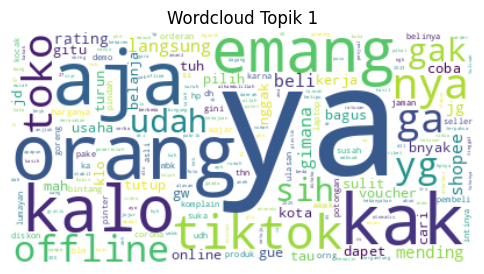

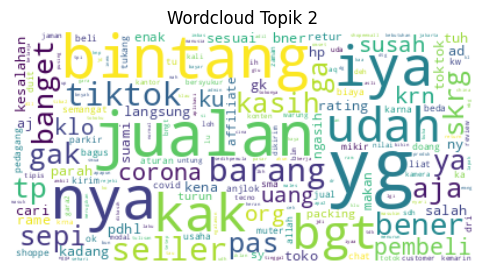

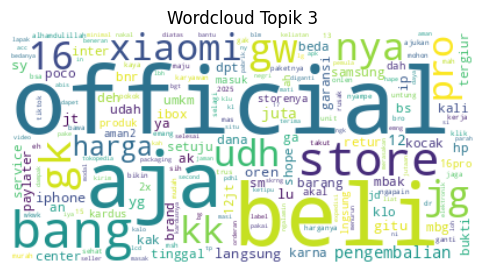

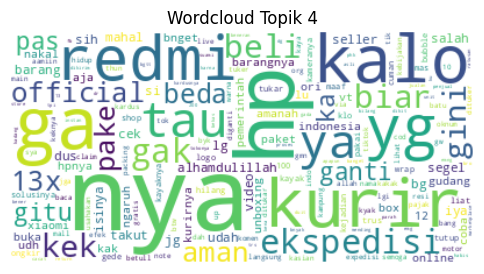

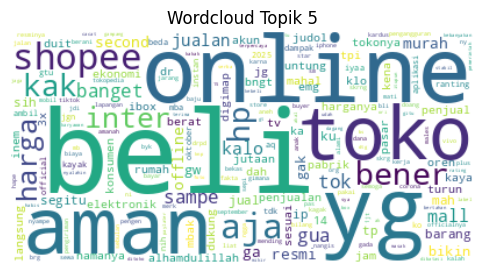

In [ ]:
#  WORDCLOUD UNTUK SETIAP TOPIK
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for i, topic in enumerate(lda.components_):
    plt.figure(figsize=(6,4))
    wc = WordCloud(background_color="white")
    wc.generate_from_frequencies(dict(zip(words, topic)))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Wordcloud Topik {i+1}")
    plt.show()

#**Kesimpulan**

In [ ]:
print("\n=== KESIMPULAN PROYEK ===")

if bert_f1 > svm_f1:
    best = "IndoBERT"
else:
    best = "SVM"

print(f"Model terbaik berdasarkan Macro F1: {best}")

print("\nTopik utama yang muncul dari komentar:")
for i, topic in enumerate(lda.components_):
    top_words = [words[j] for j in topic.argsort()[-8:]]
    print(f"- Topik {i+1}: {', '.join(top_words)}")



=== KESIMPULAN PROYEK ===
Model terbaik berdasarkan Macro F1: SVM

Topik utama yang muncul dari komentar:
- Topik 1: nya, tiktok, emang, kalo, kak, aja, orang, ya
- Topik 2: udah, bgt, kak, iya, bintang, nya, jualan, yg
- Topik 3: 16, gw, gk, store, bang, aja, beli, official
- Topik 4: tau, yg, redmi, kalo, kurir, ga, hp, nya
- Topik 5: bener, aja, shopee, toko, aman, yg, online, beli
